### Podatkovno rudarjenje, 2. domača naloga, 4. 4. 2018

# Iskanje strukture v podatkih

**Alen Herceg 63160126** 

Z modeliranjem skušamo poiskati strukturo v podatkih. Z metodami nenadzorovanga modeliranja skušamo poiskati skupine podobnih podatkov oz. skupine primerov.

V nalogi boste uporabili modeliranje verjetnostnih porazdelitev za iskanje osamelcev ter metode za iskanje skupin podobnih primerov (gručenje).

## Podatki

Opis podatkovne zbirke MovieLens ostaja enak prvi nalogi.

## Vprašanja

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne toliko implementacija vaše rešitve.

### 1. Iskanje osamelcev (50%) 
O ocenah katerih filmov so si uporabniki najmanj enotni? Povedano drugače, za katere filme so pripadajoče ocene najbolj razpršene?

Formuliraj problem kot modeliranje verjetnostne porazdelitve. Premisli o naslednjih vprašanjih, naredi ustrezne poizkuse in odgovori.

In [36]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')
import numpy as np
from collections import defaultdict
from scipy.stats import beta

Odgovor: **odgovor lahko zapišete v več celic**

### 1.1. vprašanje:

Katera je ustrezna naključna spremenljivka (količina) v podatkih, ki odgovarja na vprašanje?        

Odgovor: Ključna spremenljivka bi bila ocena filma, saj ta nam bo pokazala za vsak filem, koliko se uporabniki razlikujejo glede mnenja.

### 1.2. vprašanje:
Nariši njeno porazdelitev, npr., s pomočjo histograma.

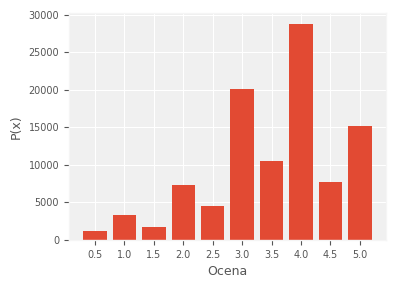

In [114]:
    readerRatings = csv.DictReader(open('ratings.csv', 'rt', encoding='utf-8'))
    ratings = {}
    for row in readerRatings:
        userR = row["userId"]
        movieR = row["movieId"]
        ratingR = row["rating"]
        timestampR = row["timestamp"]
        if ratingR not in ratings:
            ratings.update({ratingR:1})
        else:
            ratings[ratingR] += 1;

plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.bar(ratings.keys(),ratings.values())
plt.xlabel("Ocena")
plt.ylabel("P(x)");

Odgovor: V histogramu se najboljše vidi njena porazdelitev.

### 1.3. vprašanje:

Ali porazdelitev spominja na kakšno znano porazdelitev? Ali je porazdelitev morda normalna ali katera druga? 

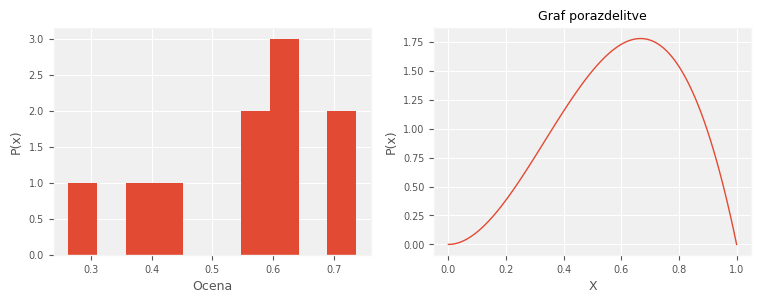

In [151]:
a, b = (3, 2)
sample = beta.rvs(a, b, size=len(ratings)) 
xr = np.linspace(0, 1, 100)
P  = [beta.pdf(x, a, b) for x in xr]

plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.hist(sample)
plt.xlabel("Ocena")
plt.ylabel("P(x)");

plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P)
plt.ylabel("P(x)")
plt.xlabel("X");

Odgovor: porazdelitev najbolj spominja na Beta porazdelitev.

### 1.4. vprašanje:

Oceni parametre te porazdelitve s pomočjo postopkov, ki smo jih spoznali na vajah.  Izmed porazdelitev, ki smo jih spoznali na vajah, izberi tisto, ki se podatkom najbolj prilega.        

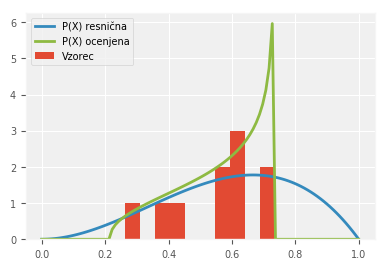

In [153]:
parameters = beta.fit(sample)
P_fit = [beta.pdf(x, *parameters) for x in xr ]

plt.figure()
plt.hist(sample,    label="Vzorec")
plt.plot(xr, P, label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)
plt.legend()

Odgovor: **odgovor lahko zapišete v več celic**

### 1.5. vprašanje:

Izpiši filme z vrednostjo naključne spremenljivke, ki spada v zgornjih 5% statistično značilnih primerov. 

In [6]:
# kodo lahko razdelite v več celic

Odgovor: **odgovor lahko zapišete v več celic**

### 2. Gručenje filmov (50%)

Priporočilni sistemi pogosto odkrivajo skupine predmetov (v našem primeru filme), za katere velja visoka podobnost. 

Poiščite 100 najbolj gledanih filmov. Ali med njimi obstajajo skupine?
Uporabite ustrezen algoritem za gručenje. Na film lahko gledamo kot vektor, kjer je  
število komponent enako številu uporabnikov. 

Vektorji vsebujejo tudi *neznane vrednosti*.
Primer vektorjev za deset filmov prikazuje spodnja tabela.

Algoritme gručenja lahko izvajamo v izvornem prostoru (koordinatni sistem filmi-uporabniki) ali pa filme primerjamo z merami podobnosti, ki smo jih spoznali na vajah. 
Premisli, kateri način je primernejši glede na obliko podatkov.

| x          |Movie                                      | $u_0$ |$u_1$ | $u_2$ | $\cdots$ |
|------------|-------------------------------------------|:-----:|:----:|:------|:--------:|
|$\vec{x_0}$ | Fight Club (1999)                         | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_1}$ | Twelve Monkeys (a.k.a. 12 Monkeys) (1995) | ?     | ?    | 2.5   | $\cdots$ |
|$\vec{x_2}$ | Independence Day (a.k.a. ID4) (1996)      | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_3}$ | Dances with  Wolves (1990)                | 4.0   | ?    | ?     | $\cdots$ |
|$\vec{x_4}$ | Fargo (1996)                              | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_5}$ | Speed (1994)                              | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_6}$ | Apollo 13 (1995)                          | ?     | 2.0  | ?     | $\cdots$ |
|$\vec{x_7}$ | Seven (a.k.a. Se7en) (1995)               | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_8}$ | Sixth Sense, The (1999)                   | 3.0   | ?    | 4.0   | $\cdots$ |
|$\vec{x_9}$ | Aladdin (1992)                            | ?     | ?    | ?     | $\cdots$ |
|$\cdots$    | $\cdots$                                  | $\cdots$ | $\cdots$  | $\cdots$ | $\cdots$ |

Pri tem odgovori na naslednja vprašanja.

### 2.1. vprašanje:

Utemelji izbiro algoritma in mere podobnosti.

In [7]:
readerRatings = DictReader(open('ratings.csv', 'rt', encoding='utf-8'))
for row in readerRatings:
    userR = row["userId"]
    movieR = row["movieId"]
    ratingR = row["rating"]
    timestampR = row["timestamp"]

Odgovor: uporabil bom algoritem hierarhičnega grupiranja, saj so podatki zelo primerni za to. podatke lahke razdelimo na filme in število ocen(uporabnikov) in označimo kateri uporabnik je gledal doloćen filem(kot kaže graf odzgoraj)

### 2.2. vprašanje:

Koliko skupin filmov je med izbranimi? Ali poznamo kvantitativne ocene za različne možnosti razvrščanja v skupine?

In [8]:
# kodo lahko razdelite v več celic

Odgovor: **odgovor lahko zapišete v več celic**

### 2.3. vprašanje:

Prikaži rezultate z uporabo ustrezne vizualizacije.

In [9]:
# kodo lahko razdelite v več celic

Odgovor: **odgovor lahko zapišete v več celic**

### 2.4. vprašanje:

Komentiraj smiselnost dobljenih rezultatov.

In [10]:
# kodo lahko razdelite v več celic

Odgovor: **odgovor lahko zapišete v več celic**